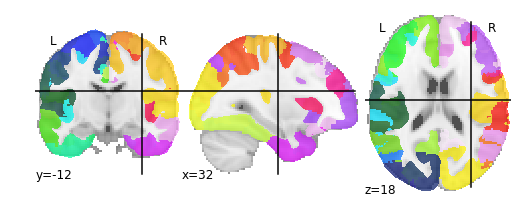

In [7]:
from nilearn import datasets
from nilearn.plotting import plot_roi
from nilearn.input_data import NiftiLabelsMasker

schaefer400 = datasets.fetch_atlas_schaefer_2018(n_rois=400, 
                                           yeo_networks=7, 
                                           resolution_mm=1,
                                           data_dir=None, 
                                           base_url=None, 
                                           resume=True, 
                                           verbose=1)
schaefer400_maps = schaefer400['maps']
n_parcels = len(schaefer400['labels'])
plot_roi(schaefer400_maps)

In [23]:
from nilearn import surface
from nilearn import plotting

big_fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
big_texture = surface.vol_to_surf(schaefer400_maps, big_fsaverage.pial_right)

#fsaverage = datasets.fetch_surf_fsaverage()
#texture = surface.vol_to_surf(schaefer400_maps, fsaverage.pial_right)

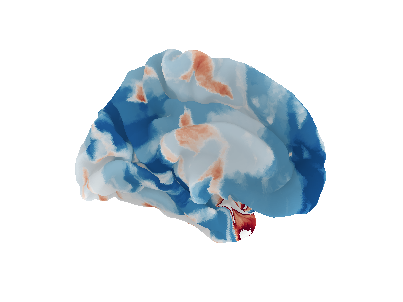

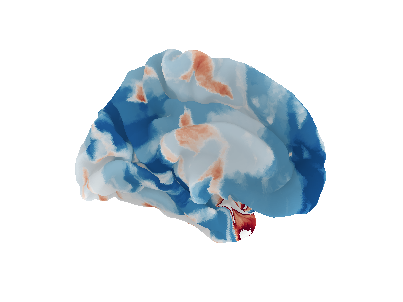

In [25]:
plotting.plot_surf_roi(big_fsaverage['pial_left'], roi_map=big_texture,
                       hemi='left', view='medial',
                       bg_map=big_fsaverage['sulc_left'], bg_on_data=True,
                       cmap = 'RdBu',
                       darkness=.5)


In [31]:
import numpy as np
from nilearn import datasets, plotting, input_data, signal, image 
from nilearn.input_data import NiftiLabelsMasker

schaefer = input_data.NiftiLabelsMasker(schaefer400_maps)

data_dir = '/media/finc/Elements/fMRIDenoise_data/BIDS_LearningBrain/derivatives/fmridenoise/'

subjects = ['sub-01', 'sub-02', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-10']
sessions = ['ses-1', 'ses-2', 'ses-3', 'ses-4']

space = 'space-MNI152NLin2009cAsym_desc'
suffix = 'preproc_bold_denoised_pipeline-36_parameters_gs.nii.gz'

tasks = {'rest': 305, 'dualnback': 340}

n_sub = len(subjects)
n_ses = len(sessions)

timeseries_rest = np.zeros((n_sub, n_ses, tasks['rest'], n_parcels))
timeseries_dualnback = np.zeros((n_sub, n_ses, tasks['dualnback'], n_parcels))


for task, n_scans in tasks.items():
    for i, sub in enumerate(subjects):
        for j, ses in enumerate(sessions):
            sub_dir = f'{data_dir}{sub}/{ses}/'
            denoised_file = f'{sub}_{ses}_task-{task}_{space}-{suffix}'
            denoised_path = f'{sub_dir}{denoised_file}'
            timeseries = schaefer.fit_transform(denoised_path, confounds=None)
            if task == 'rest':
                timeseries_rest[i, j, :, :] = timeseries
            else:
                timeseries_dualnback[i, j, :, :] = timeseries

np.save(f'timeseries_schaefer400_rest.npy', timeseries_rest)
np.save(f'timeseries_schaefer400_dualnback.npy', timeseries_dualnback)